In [1]:
import numpy as np
import pandas as pd

In [2]:
delivery = pd.read_csv('/content/deliveries.csv')
matches = pd.read_csv('/content/matches.csv')

In [3]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
delivery.head()


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
matches.shape

(756, 18)

In [6]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].add(1).reset_index()

In [7]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [8]:
matches_df = matches.merge(total_score_df[['match_id','total_runs']],left_on = 'id',right_on='match_id')

In [9]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [10]:
teams = ['Sunrisers Hyderabad',
      'Mumbai Indians',
      'Royal Challengers Bangalore',
      'Kolkata Knight Riders',
      'Kings XI Punjab',
      'Chennai Super Kings',
      'Rajasthan Royals',
      'Delhi Capitals']

In [11]:
matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['team2'] = matches_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [12]:
matches_df['team1'] = matches_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team2'] = matches_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [13]:
match_df = matches_df[matches_df['team1'].isin(teams)]
match_df = matches_df[matches_df['team2'].isin(teams)]

In [14]:
matches_df.shape

(756, 20)

In [15]:
matches_df = matches_df[['match_id','city','winner','total_runs']]

In [16]:
delivery_df = matches_df.merge(delivery,on = 'match_id')

In [17]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [18]:
delivery_df.shape

(86240, 24)

In [19]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
179074,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
179075,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
179076,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [20]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

In [21]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [22]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
179074,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
179075,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
179076,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [23]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [24]:
# current run rate (crr) = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [25]:
# rrr (required run rate)  = runs left/overs

In [26]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [27]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.000000,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.000000,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.000000,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.500000,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.400000,10.486957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,1,4,5,7.862069,1.500000
179074,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-1,3,5,7.897436,-2.000000
179075,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-2,2,4,7.881356,-6.000000
179076,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-4,1,4,7.915966,-24.000000


In [28]:
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

In [29]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [30]:
final_df = delivery_df[['match_id', 'batting_team', 'bowling_team', 'city',
                        'runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [31]:
final_df = final_df.sample(final_df.shape[0])

In [32]:
final_df.sample()

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
67728,286,Pune Warriors,Deccan Chargers,Hyderabad,68,70,9,137,8.28,5.828571,1


In [33]:
final_df.dropna(inplace=True)

In [34]:
final_df = final_df[final_df['balls_left'] != 0]

In [53]:
from sklearn.model_selection import train_test_split

# x_train, y_train WITHOUT match_id
x_train = train_df.drop(columns=['match_id', 'result'])
y_train = train_df['result']

x_test = test_df.drop(columns=['match_id', 'result'])
y_test = test_df['result']


print("Train rows :", x_train.shape)
print("Test rows  :", x_test.shape)


Train rows : (68223, 9)
Test rows  : (16900, 9)


In [54]:
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
84606,Rajasthan Royals,Pune Warriors,Pune,82,87,9,126,8.000000,5.655172
127538,Kolkata Knight Riders,Sunrisers Hyderabad,Visakhapatnam,116,75,8,177,8.133333,9.280000
11236,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,154,114,10,168,14.000000,8.105263
87565,Mumbai Indians,Kolkata Knight Riders,Mumbai,35,10,2,141,5.781818,21.000000
82447,Delhi Daredevils,Rajasthan Royals,Jaipur,41,56,8,142,9.468750,4.392857
...,...,...,...,...,...,...,...,...,...
3981,Royal Challengers Bangalore,Rising Pune Supergiant,Bangalore,116,81,8,162,7.076923,8.592593
89210,Mumbai Indians,Rajasthan Royals,Jaipur,84,60,10,163,7.900000,8.400000
76363,Pune Warriors,Chennai Super Kings,Pune,115,97,9,156,10.695652,7.113402
132808,Kolkata Knight Riders,Kings XI Punjab,Kolkata,94,47,6,184,7.397260,12.000000


In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     ['batting_team','bowling_team','city'])
],
remainder='passthrough')


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [57]:
pipe = Pipeline(steps=[
  ('step1',trf),
  ('step2',RandomForestClassifier())
  ])

In [58]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [59]:
y_pred = pipe.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7781656804733728

In [61]:
pipe.predict_proba(x_test)[7]

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([0.01, 0.99])

In [62]:
def match_progression(delivery_df, match_id, pipe):

    # Filter the match
    match = delivery_df[delivery_df['match_id'] == match_id]

    # Only use end-of-over balls (ball == 6)
    match = match[match['ball'] == 6]

    # Select only the required columns (INCLUDING match_id here temporarily)
    temp_df = match[['match_id','batting_team','bowling_team','city',
                     'runs_left','balls_left','wickets','total_runs_x',
                     'crr','rrr']].dropna()

    # Remove rows where chase is already over
    temp_df = temp_df[temp_df['balls_left'] != 0]

    if temp_df.empty:
        raise ValueError("No valid data available for this match_id at end of overs.")


    # IMPORTANT: Drop match_id BEFORE prediction
    input_df = temp_df.drop(columns=['match_id'])

    # Predict win probabilities
    result = pipe.predict_proba(input_df)

    # Add win/lose percentages back to temp_df
    temp_df['lose'] = np.round(result[:,0]*100, 1)
    temp_df['win']  = np.round(result[:,1]*100, 1)

    temp_df['end_of_over'] = range(1, temp_df.shape[0] + 1)

    # Extract target run from first row
    target = temp_df['total_runs_x'].iloc[0]

    runs_after_over = temp_df['total_runs_x'].values[0] - temp_df['runs_left'].values[0]
    wickets_in_over = 10 - temp_df['wickets'].values[0]

    temp_df['runs_after_over'] = runs_after_over
    temp_df['wickets_in_over'] = wickets_in_over

    return temp_df, target



In [63]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

,match_id,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,lose,win,end_of_over,runs_after_over,wickets_in_over
17279,74,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,175,114,10,179,4.000000,9.210526,95.0,5.0,1,4,0
17287,74,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,167,108,10,179,6.000000,9.277778,100.0,0.0,2,4,0
17293,74,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,166,102,10,179,4.333333,9.764706,94.0,6.0,3,4,0
17299,74,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,159,96,9,179,5.000000,9.937500,99.0,1.0,4,4,0
17305,74,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,147,90,9,179,6.400000,9.800000,100.0,0.0,5,4,0
17311,74,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,134,84,9,179,7.500000,9.571429,100.0,0.0,6,4,0
17317,74,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,125,78,9,179,7.714286,9.615385,100.0,0.0,7,4,0
17325,74,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,110,72,9,179,8.625000,9.166667,98.0,2.0,8,4,0
17331,74,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,103,66,9,179,8.444444,9.363636,97.0,3.0,9,4,0
17338,74,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,86,60,9,179,9.300000,8.600000,98.0,2.0,10,4,0


Text(0.5, 1.0, 'target-179')

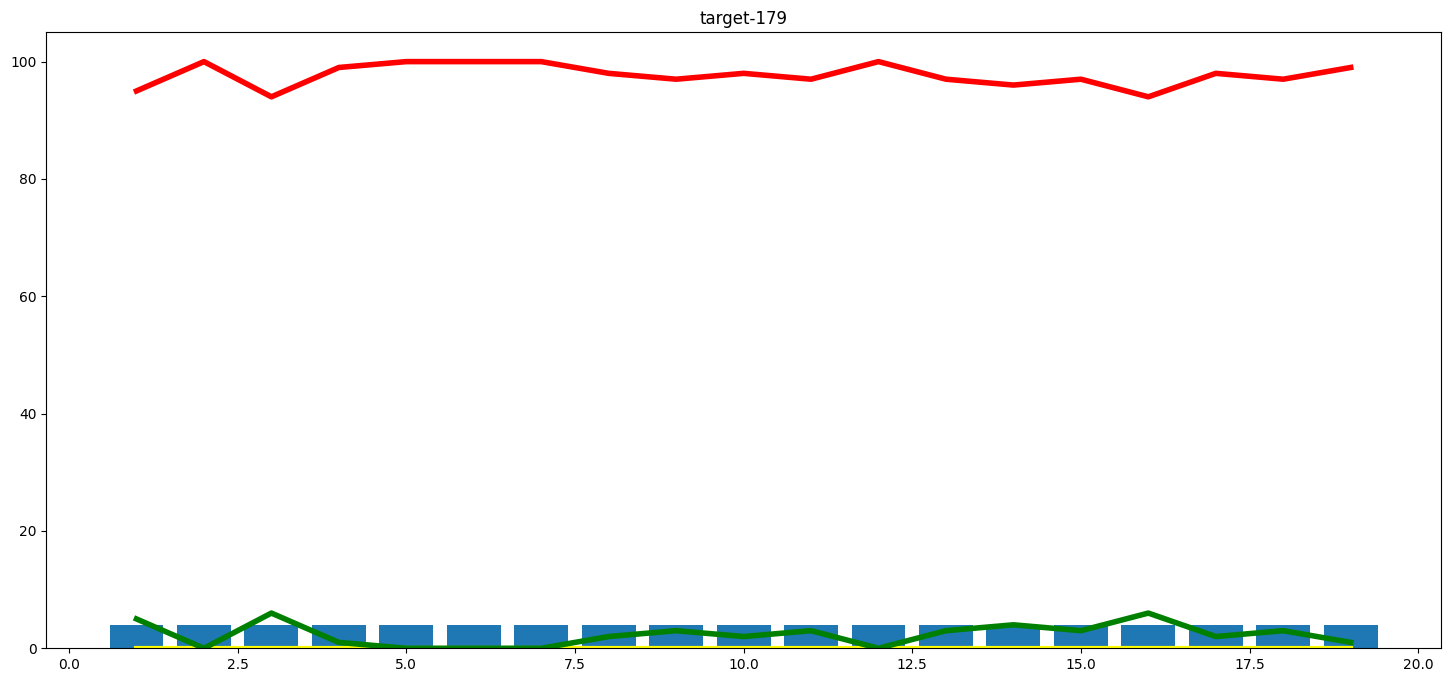

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('target-' + str(target))

In [65]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [66]:
delivery_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [67]:
import sklearn
print(sklearn.__version__)


1.6.1
